In [2]:
import urllib.request
import pandas as pd

In [3]:
source_url = "ftp://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/Escherichia_coli/reference/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz"
gff_file = "E_coli.gff.gz"

In [4]:
urllib.request.urlretrieve(source_url, gff_file)

('E_coli.gff.gz', <email.message.Message at 0x7fef07b99c50>)

In [5]:
gff_data = pd.read_csv(gff_file, sep="\t", comment="#", 
                       names=["seqid", "source", "type", "start", "end", "score", "strand", "phase", "attributes"])

In [6]:
gff_data

,seqid,source,type,start,end,score,strand,phase,attributes
0,NC_000913.3,RefSeq,region,1,4641652,.,+,.,ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;...
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...
...,...,...,...,...,...,...,...,...,...
9485,NC_000913.3,RefSeq,CDS,4640402,4640542,.,+,0,ID=cds-NP_418819.1;Parent=gene-b4402;Dbxref=Un...
9486,NC_000913.3,RefSeq,gene,4640718,4640771,.,+,.,"ID=gene-b4824;Dbxref=ECOCYC:G0-17098,GeneID:71..."
9487,NC_000913.3,RefSeq,CDS,4640718,4640771,.,+,0,ID=cds-YP_010283921.1;Parent=gene-b4824;Dbxref...
9488,NC_000913.3,RefSeq,gene,4640942,4641628,.,+,.,"ID=gene-b4403;Dbxref=ASAP:ABE-0014442,ECOCYC:E..."


In [7]:
type(gff_data)

pandas.core.frame.DataFrame

In [8]:
gff_data.shape

(9490, 9)

In [9]:
gff_data["type"]

0       region
1         gene
2          CDS
3         gene
4          CDS
         ...  
9485       CDS
9486      gene
9487       CDS
9488      gene
9489       CDS
Name: type, Length: 9490, dtype: object

In [10]:
gff_data["type"].unique()

array(['region', 'gene', 'CDS', 'mobile_genetic_element', 'ncRNA', 'exon',
       'rRNA', 'tRNA', 'pseudogene', 'sequence_feature',
       'origin_of_replication'], dtype=object)

In [11]:
gff_data["type"].value_counts()

type
gene                      4494
CDS                       4337
exon                       207
pseudogene                 145
ncRNA                       99
tRNA                        86
mobile_genetic_element      50
sequence_feature            48
rRNA                        22
region                       1
origin_of_replication        1
Name: count, dtype: int64

In [13]:
gff_data[gff_data["type"] == "gene"]

,seqid,source,type,start,end,score,strand,phase,attributes
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
5,NC_000913.3,RefSeq,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E..."
7,NC_000913.3,RefSeq,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E..."
9,NC_000913.3,RefSeq,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G..."
...,...,...,...,...,...,...,...,...,...
9480,NC_000913.3,RefSeq,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E..."
9482,NC_000913.3,RefSeq,gene,4639590,4640306,.,-,.,"ID=gene-b4401;Dbxref=ASAP:ABE-0014434,ECOCYC:E..."
9484,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."
9486,NC_000913.3,RefSeq,gene,4640718,4640771,.,+,.,"ID=gene-b4824;Dbxref=ECOCYC:G0-17098,GeneID:71..."


In [14]:
gff_data_genes = gff_data[gff_data["type"] == "gene"]

In [15]:
gff_data["length"] = gff_data["end"] - gff_data["start"] + 1

In [16]:
gff_data

,seqid,source,type,start,end,score,strand,phase,attributes,length
0,NC_000913.3,RefSeq,region,1,4641652,.,+,.,ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;...,4641652
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E...",66
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...,66
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E...",2463
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...,2463
...,...,...,...,...,...,...,...,...,...,...
9485,NC_000913.3,RefSeq,CDS,4640402,4640542,.,+,0,ID=cds-NP_418819.1;Parent=gene-b4402;Dbxref=Un...,141
9486,NC_000913.3,RefSeq,gene,4640718,4640771,.,+,.,"ID=gene-b4824;Dbxref=ECOCYC:G0-17098,GeneID:71...",54
9487,NC_000913.3,RefSeq,CDS,4640718,4640771,.,+,0,ID=cds-YP_010283921.1;Parent=gene-b4824;Dbxref...,54
9488,NC_000913.3,RefSeq,gene,4640942,4641628,.,+,.,"ID=gene-b4403;Dbxref=ASAP:ABE-0014442,ECOCYC:E...",687


In [17]:
gff_data_genes = gff_data[gff_data["type"] == "gene"]

In [18]:
gff_data_genes["length"].mean()

899.1562082777036

In [19]:
gff_data_genes["length"].median()

795.0

<Axes: >

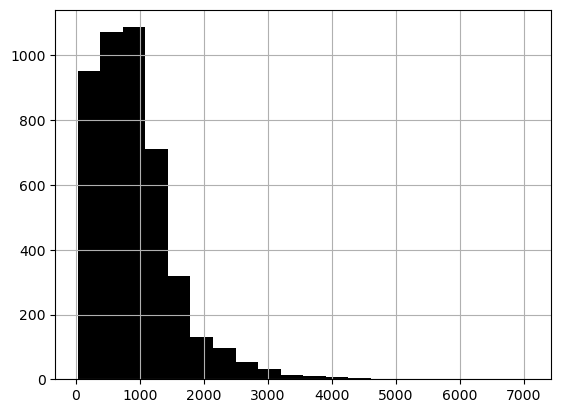

In [20]:
gff_data_genes["length"].hist(bins=20, color="black")

In [24]:
gff_data["length"] = gff_data["end"] - gff_data["start"] + 1

In [26]:
gff_data_types_and_length = gff_data[["type", "length"]]

In [27]:
gff_data_types_and_length

,type,length
0,region,4641652
1,gene,66
2,CDS,66
3,gene,2463
4,CDS,2463
...,...,...
9485,CDS,141
9486,gene,54
9487,CDS,54
9488,gene,687


In [28]:
gff_data_types_and_length.groupby(["type"]).mean()

,length
type,
CDS,9.282624e+02
exon,2.504493e+02
gene,8.991562e+02
mobile_genetic_element,1.031480e+03
ncRNA,1.314444e+02
origin_of_replication,2.320000e+02
pseudogene,9.342138e+02
rRNA,1.458318e+03
region,4.641652e+06


In [32]:
gff_data_types_and_length.groupby(["type"]).min().to_csv("min_length_by_type.csv", sep="\t")